# Airpollution data for leeds from texmex package

Air pollution data from Leeds (U.K.) city centre, collected from 1994 to 1998. 

$\rightarrow$ we are interested if there are dependences in the data that can be exploited to reduce dimensionality of the extreme events.

In [1]:
library(texmex)
library(ggplot2)
library(dplyr)
library(reshape2)
library(tibble)
library(maxstablePCA)

Loading required package: mvtnorm

Loading required package: ggplot2


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
summer <- as_tibble(summer)
head(summer)

O3,NO2,NO,SO2,PM10
<int>,<int>,<int>,<int>,<int>
32,48,94,8,27
29,49,86,6,25
32,34,16,20,32
32,35,79,9,22
33,50,108,11,24
27,58,92,16,26


# Basic overview data

4 columns of gasses in ppb, PM10 is column of particle matters in microgram/m^3

In [3]:
summary(summer)

       O3          NO2               NO              SO2        
 Min.   : 8   Min.   :  9.00   Min.   :  4.00   Min.   :  0.00  
 1st Qu.:26   1st Qu.: 30.00   1st Qu.: 30.00   1st Qu.:  5.00  
 Median :31   Median : 36.00   Median : 47.00   Median :  8.00  
 Mean   :32   Mean   : 37.63   Mean   : 55.20   Mean   : 17.37  
 3rd Qu.:36   3rd Qu.: 45.00   3rd Qu.: 71.75   3rd Qu.: 15.00  
 Max.   :84   Max.   :105.00   Max.   :256.00   Max.   :313.00  
      PM10       
 Min.   :  9.00  
 1st Qu.: 26.00  
 Median : 34.00  
 Mean   : 41.12  
 3rd Qu.: 50.00  
 Max.   :185.00  

# Transform to unit Fréchet and look at bivariate plots

$\rightarrow$ use provided transformation function  using the classic transformation from Resnick with empirical distributions. 

Plots are on the following slides.

In [4]:
summer_trafo <- transform_unitfrechet(summer) %>% as_tibble()

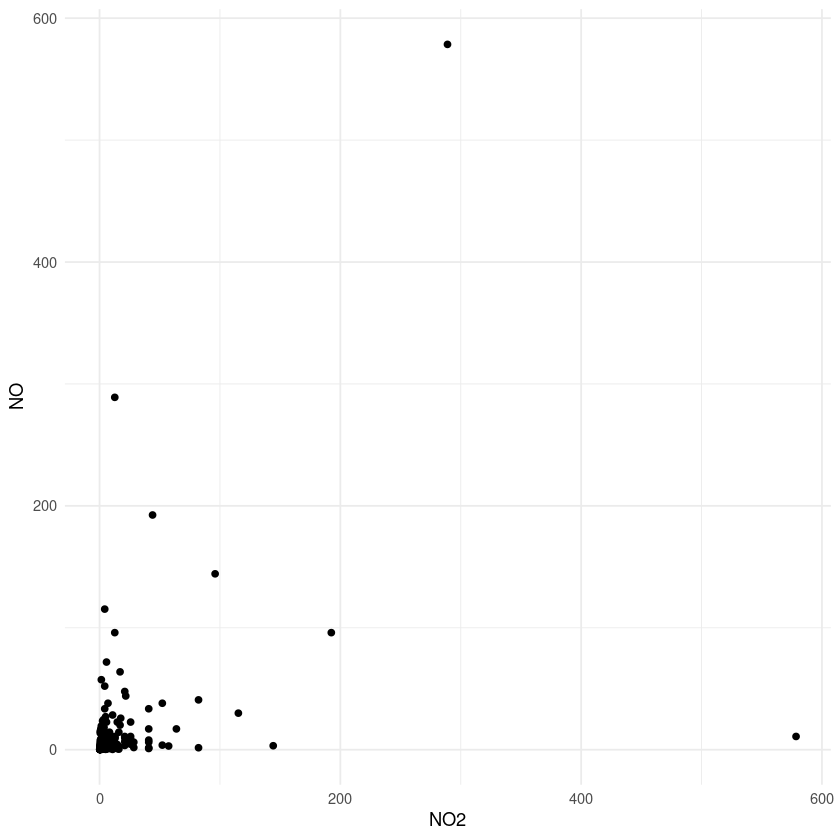

In [5]:
ggplot(summer_trafo, aes(x = NO2, y = NO)) +
geom_point() + 
theme_minimal()

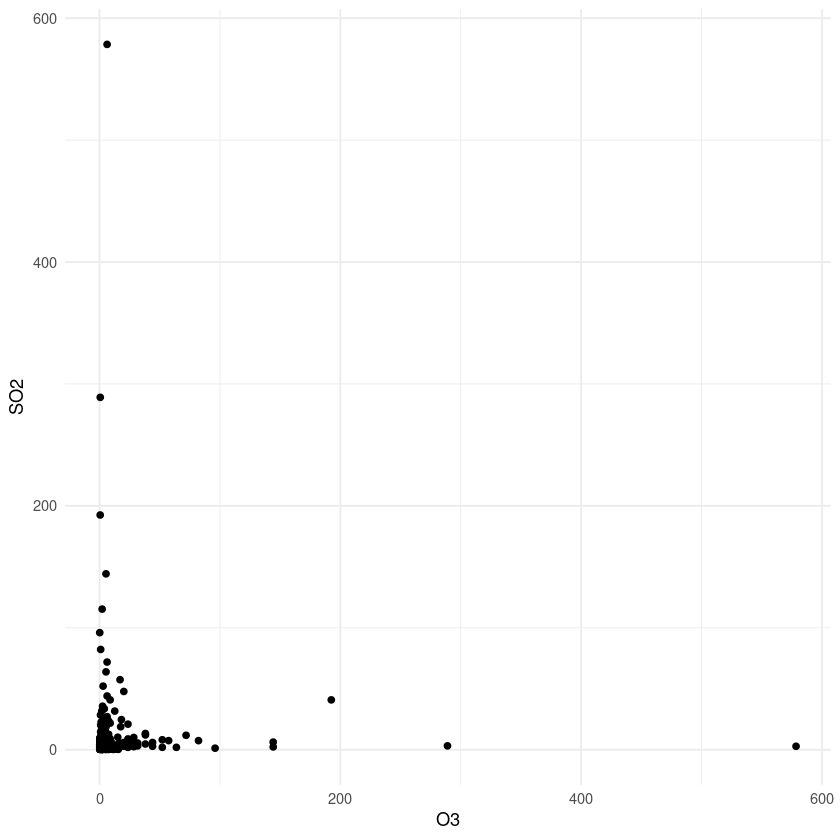

In [6]:
ggplot(summer_trafo, aes(x = O3, y = SO2)) +
geom_point() + 
theme_minimal()

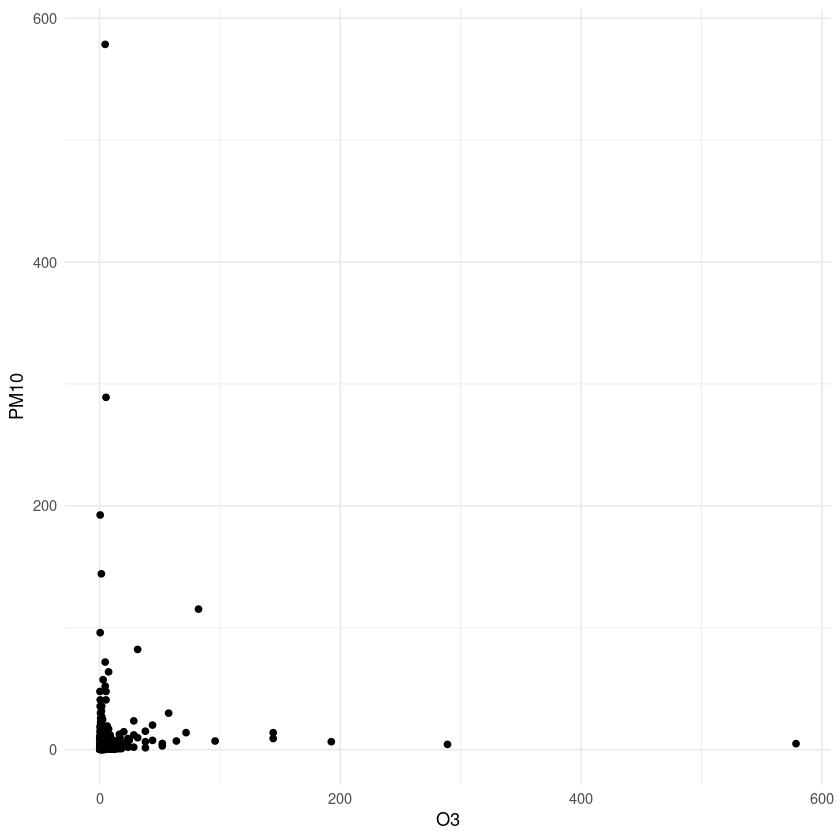

In [7]:
ggplot(summer_trafo, aes(x = O3, y = PM10)) +
geom_point() + 
theme_minimal()

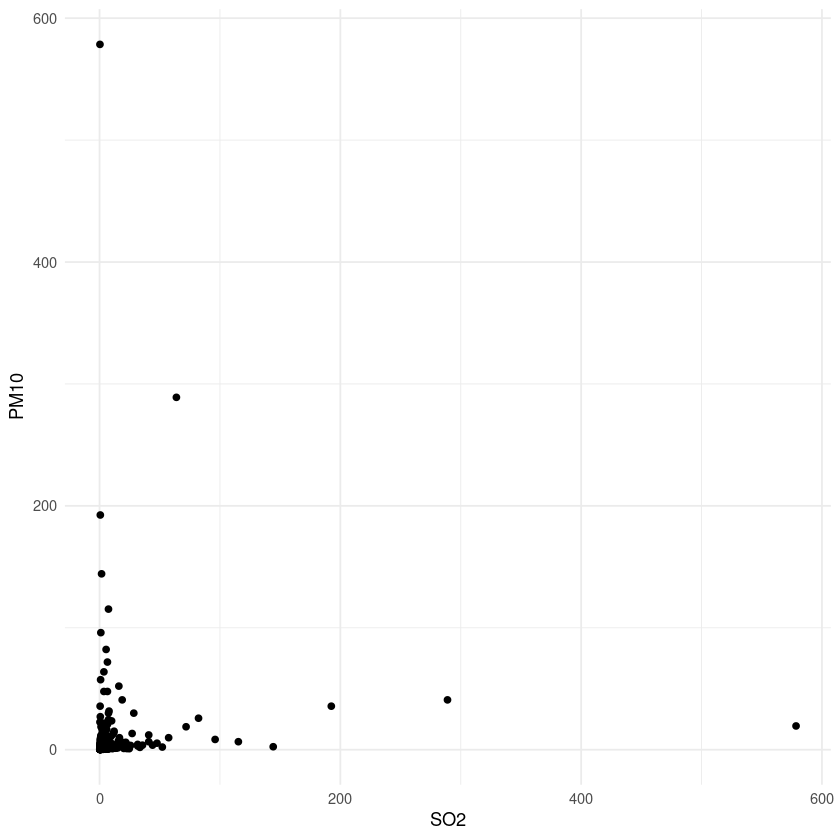

In [8]:
ggplot(summer_trafo, aes(x = SO2, y = PM10)) +
geom_point() + 
theme_minimal()

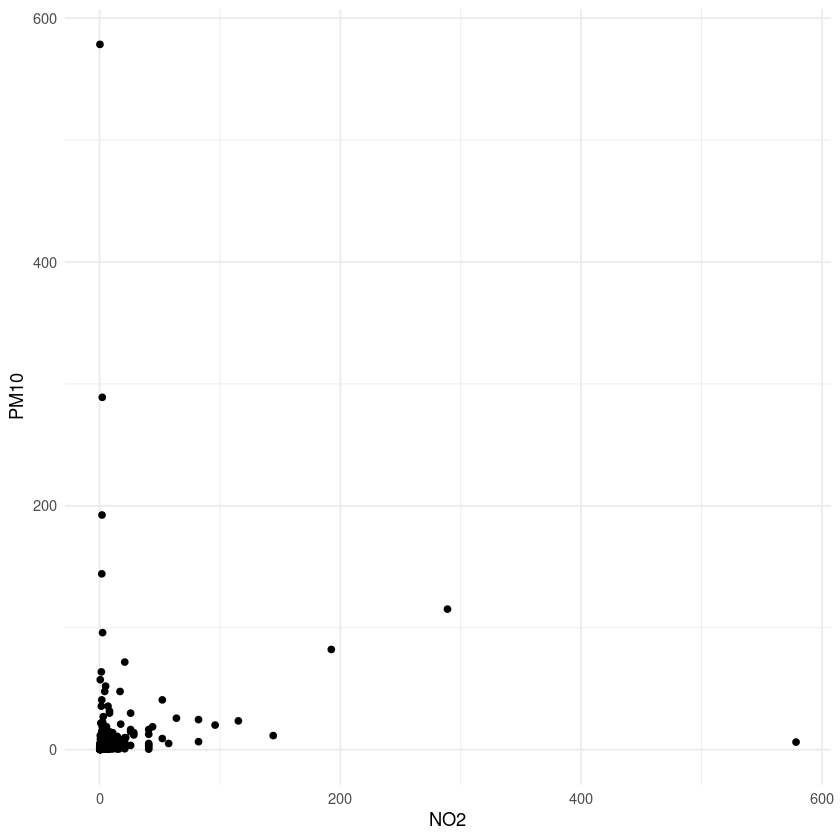

In [9]:
ggplot(summer_trafo, aes(x = NO2, y = PM10)) +
geom_point() + 
theme_minimal()

# Since dataset is reasonably small, fit max stable PCA's with p = 1,...,4 to the data

Use function *max_stable_prcomp* from package for transformation.

In [10]:
maxPCA1 <- max_stable_prcomp(summer_trafo, p = 1, n_initial_guesses = 1000)

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.



In [11]:
maxPCA2 <- max_stable_prcomp(summer_trafo, p = 2, n_initial_guesses = 1000)

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.



In [12]:
maxPCA3 <- max_stable_prcomp(summer_trafo, p = 3, n_initial_guesses = 1000)

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.



In [13]:
maxPCA4 <- max_stable_prcomp(summer_trafo, p = 4, n_initial_guesses = 1000)

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.



# Taking note of the encoder matrix can give clues on causal relationships

In [14]:
maxPCA1

$p
[1] 1

$d
[1] 5

$decoder_matrix
          [,1]
[1,] 0.7130168
[2,] 4.3347407
[3,] 1.1268525
[4,] 0.1228095
[5,] 0.8880728

$encoder_matrix
            [,1]      [,2]        [,3]         [,4]         [,5]
[1,] 0.001308781 0.2306943 0.009374207 0.0005675352 8.033958e-05

$reconstr_matrix
             [,1]       [,2]        [,3]         [,4]         [,5]
[1,] 0.0009331827 0.16448892 0.006683967 4.046621e-04 5.728347e-05
[2,] 0.0056732255 1.00000005 0.040634756 2.460118e-03 3.482512e-04
[3,] 0.0014748030 0.25995848 0.010563349 6.395285e-04 9.053086e-05
[4,] 0.0001607307 0.02833144 0.001151241 6.969869e-05 9.866460e-06
[5,] 0.0011622926 0.20487334 0.008324978 5.040126e-04 7.134739e-05

$loss_fctn_value
[1] 4.493793

$optim_conv_status
[1] 4

$s
[1] 3

attr(,"class")
[1] "max_stable_prcomp"

In [15]:
maxPCA2

$p
[1] 2

$d
[1] 5

$decoder_matrix
             [,1]        [,2]
[1,] 0.0008798029 0.011704076
[2,] 0.3296964950 0.011264325
[3,] 1.4412017834 0.000776555
[4,] 0.0305019260 0.004829838
[5,] 0.0109556423 1.440227130

$encoder_matrix
             [,1]        [,2]       [,3]        [,4]         [,5]
[1,] 0.0004886397 0.005845496 0.69386511 0.003997967 0.0003421195
[2,] 0.0055601491 0.007047471 0.02073568 0.022127244 0.6943353867

$reconstr_matrix
             [,1]         [,2]         [,3]         [,4]         [,5]
[1,] 6.507641e-05 8.248413e-05 0.0006104645 0.0002589790 0.0081265545
[2,] 1.611028e-04 1.927240e-03 0.2287648949 0.0013181158 0.0078212198
[3,] 7.042285e-04 8.424540e-03 0.9999996344 0.0057618774 0.0005391896
[4,] 2.685462e-05 1.782989e-04 0.0211642223 0.0001219457 0.0033535274
[5,] 8.007878e-03 1.014996e-02 0.0298640946 0.0318682569 1.0000006616

$loss_fctn_value
[1] 3.232325

$optim_conv_status
[1] 4

$s
[1] 3

attr(,"class")
[1] "max_stable_prcomp"

In [16]:
maxPCA3

$p
[1] 3

$d
[1] 5

$decoder_matrix
            [,1]         [,2]        [,3]
[1,] 0.005942838 0.0022804749 0.947906665
[2,] 0.931760853 0.0005213781 0.006059178
[3,] 0.242244419 0.0006924580 0.001763922
[4,] 0.026435732 0.0031079745 0.010206579
[5,] 0.006739237 0.8906730535 0.007609745

$encoder_matrix
            [,1]        [,2]         [,3]        [,4]         [,5]
[1,] 0.007634154 1.073234244 0.0322851059 0.005167367 0.0007810088
[2,] 0.008782825 0.011732804 0.0357634631 0.034204502 1.1227379973
[3,] 1.054951444 0.009598167 0.0006284324 0.001688807 0.0027685601

$reconstr_matrix
            [,1]        [,2]         [,3]         [,4]         [,5]
[1,] 0.999995506 0.009098166 0.0005956952 0.0016008318 0.0026243366
[2,] 0.007113206 0.999997655 0.0300819978 0.0048147501 0.0007277134
[3,] 0.001860852 0.259985006 0.0078208867 0.0012517658 0.0007774489
[4,] 0.010767445 0.028371733 0.0008534804 0.0001366031 0.0034894410
[5,] 0.008027912 0.010450092 0.0318535529 0.0304650281 0.9999924803



In [17]:
maxPCA4

$p
[1] 4

$d
[1] 5

$decoder_matrix
            [,1]         [,2]         [,3]         [,4]
[1,] 0.001508296 0.0009463929 0.7040647337 0.0003638906
[2,] 0.011545187 0.0003871413 0.0061362361 0.1892744527
[3,] 0.003297910 0.0002307874 0.0005851464 0.8248549522
[4,] 0.868014904 0.0002690209 0.0031653871 0.0041730764
[5,] 0.010955642 0.6764395999 0.0013940151 0.0107505031

$encoder_matrix
            [,1]        [,2]        [,3]         [,4]         [,5]
[1,] 0.005180070 0.003329827 0.006635078 1.1520528839 0.0003254080
[2,] 0.012181927 0.006744008 0.008476326 0.0343430817 1.4783286605
[3,] 1.420313885 0.008721721 0.000612282 0.0009504082 0.0031861976
[4,] 0.001348369 0.015692498 1.212333986 0.0066222250 0.0005432765

$reconstr_matrix
            [,1]        [,2]         [,3]        [,4]         [,5]
[1,] 0.999992917 0.006140656 0.0004411569 0.001737637 0.0022432894
[2,] 0.008715381 0.002970189 0.2294638517 0.013300666 0.0005723220
[3,] 0.001112209 0.012944035 0.9999996920 0.005462375 0.0

# Creating something like a screeplot is possible with the loss and increasing p

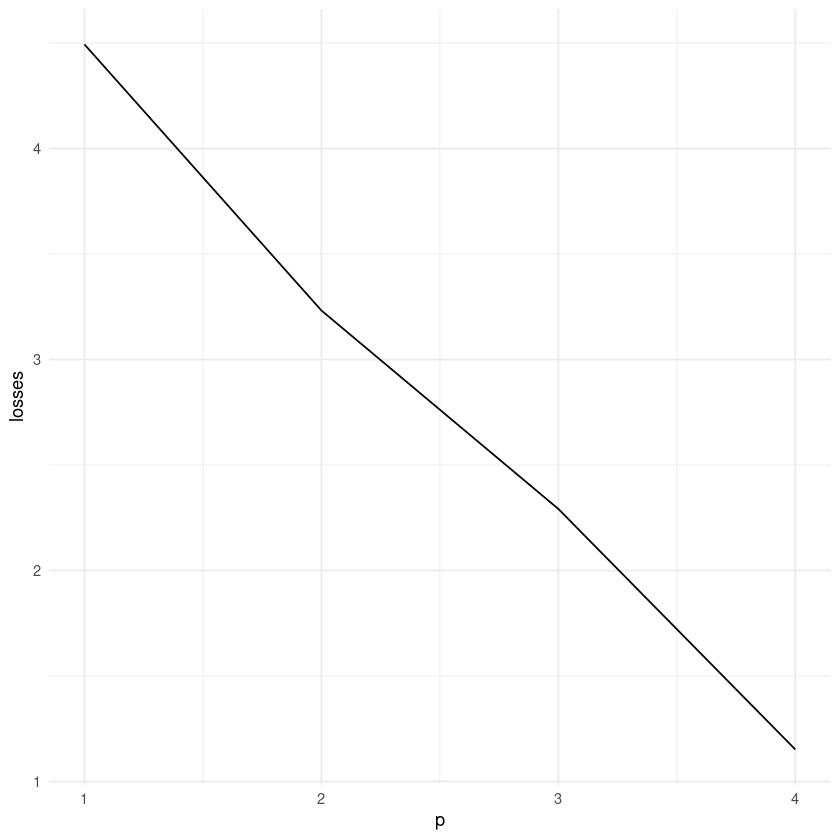

In [18]:
error_vals <- c(
    maxPCA1$loss_fctn_value,
    maxPCA2$loss_fctn_value,
    maxPCA3$loss_fctn_value,
    maxPCA4$loss_fctn_value
)

scree_df <- data.frame(p = 1:4, losses = error_vals) %>% as_tibble()

ggplot(scree_df, aes(x = p, y = losses)) + 
geom_line() + 
theme_minimal()

In [19]:
enc1 <- maxPCA1$encoder_matrix
enc2 <- maxPCA2$encoder_matrix
enc3 <- maxPCA3$encoder_matrix
enc4 <- maxPCA4$encoder_matrix

colnames(enc1) <- names(summer)
colnames(enc2) <- names(summer)
colnames(enc3) <- names(summer)
colnames(enc4) <- names(summer)

row.names(enc1) <- c("PC1")
row.names(enc2) <- c("PC1", "PC2")
row.names(enc3) <- c("PC1", "PC2", "PC3")
row.names(enc4) <- c("PC1", "PC2", "PC3", "PC4")

# Creating a heatmap of the loadings of the components and the reconstructions 

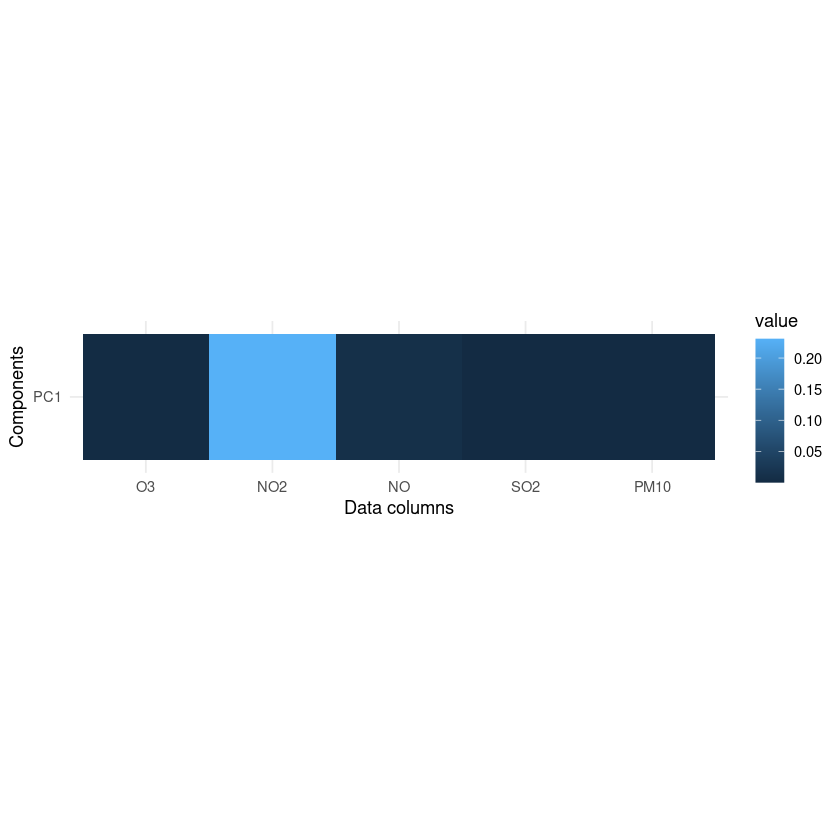

In [20]:
ggplot(melt(t(enc1)), aes(Var1,Var2, fill=value)) + 
geom_raster() + 
xlab("Data columns") + 
ylab("Components") +
coord_fixed() +
theme_minimal()

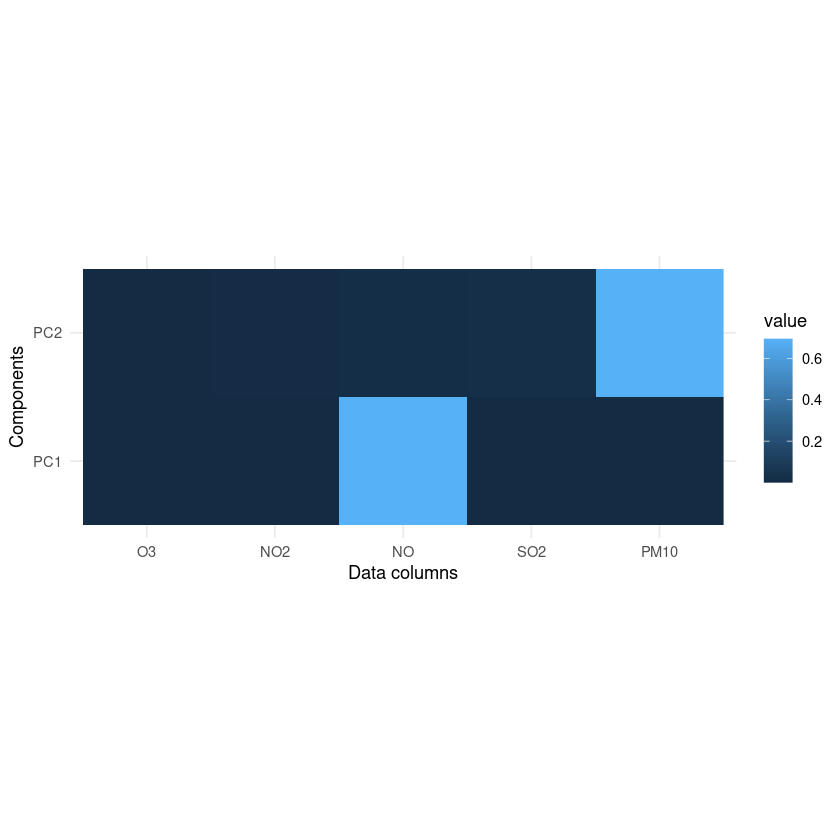

In [21]:
ggplot(melt(t(enc2)), aes(Var1,Var2, fill=value)) +
geom_raster() + 
xlab("Data columns") + 
ylab("Components") +
coord_fixed() +
theme_minimal()

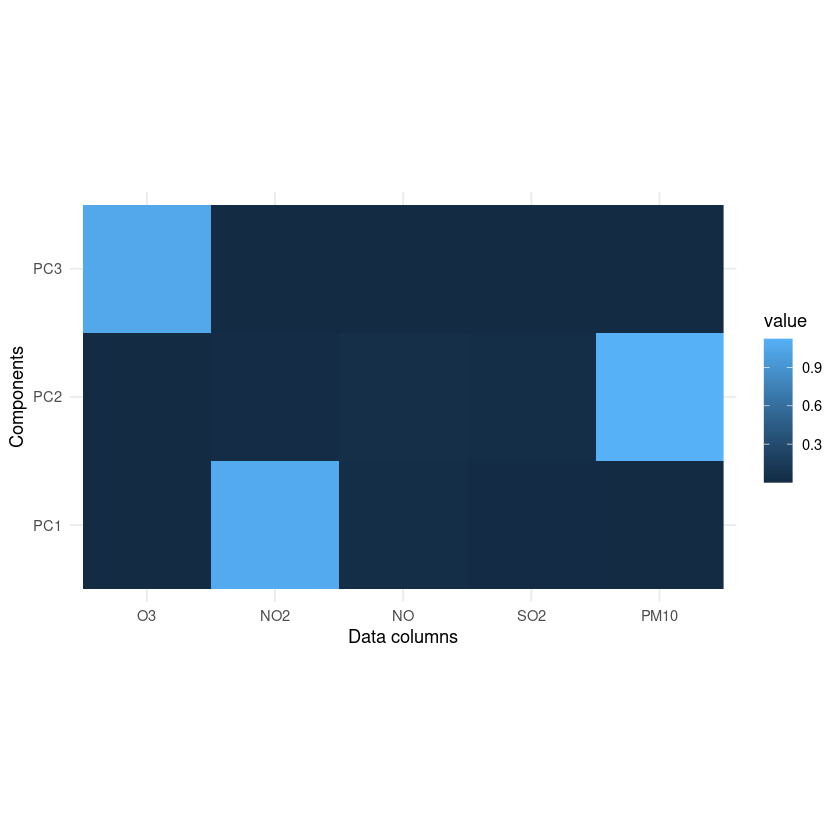

In [22]:
ggplot(melt(t(enc3)), aes(Var1,Var2, fill=value)) +
geom_raster() + 
xlab("Data columns") + 
ylab("Components") +
coord_fixed() +
theme_minimal()

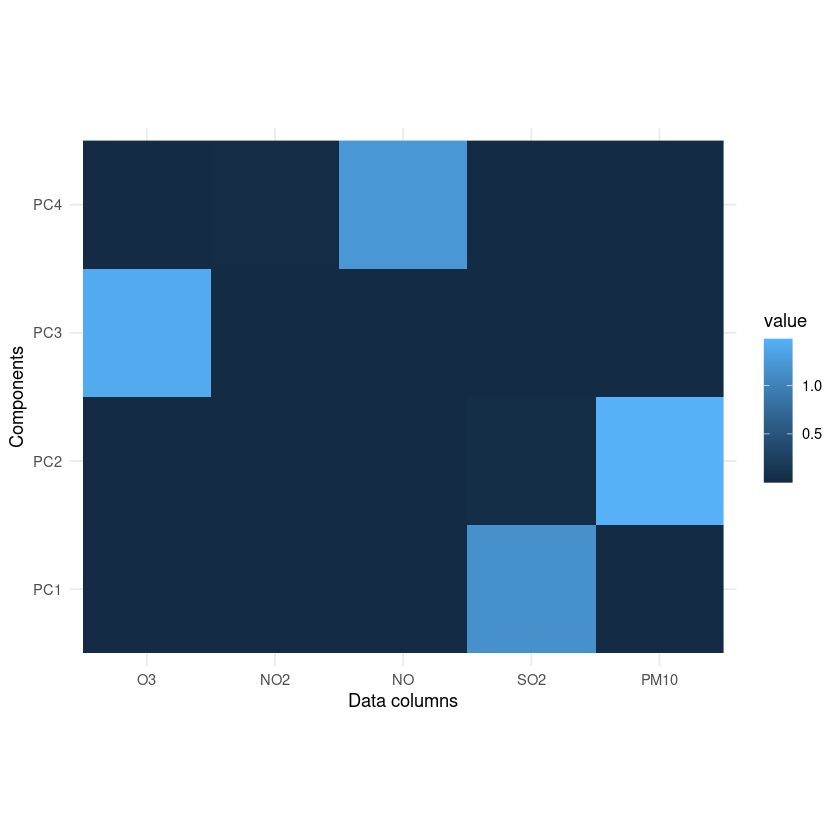

In [23]:
ggplot(melt(t(enc4)), aes(Var1,Var2, fill=value)) +
geom_raster() + 
xlab("Data columns") + 
ylab("Components") +
coord_fixed() +
theme_minimal()

# Looking at reconstructions

In [24]:
rec2 <- reconstruct(maxPCA2, compress(maxPCA2, summer_trafo)) %>% as_tibble()
rec3 <- reconstruct(maxPCA3, compress(maxPCA3, summer_trafo)) %>% as_tibble()
rec4 <- reconstruct(maxPCA4, compress(maxPCA4, summer_trafo)) %>% as_tibble()


names(rec2) <- names(summer_trafo)
names(rec3) <- names(summer_trafo)
names(rec4) <- names(summer_trafo)

Warning message:
“The `x` argument of `as_tibble.matrix()` must have unique column names if `.name_repair` is omitted as of tibble 2.0.0.
Using compatibility `.name_repair`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”


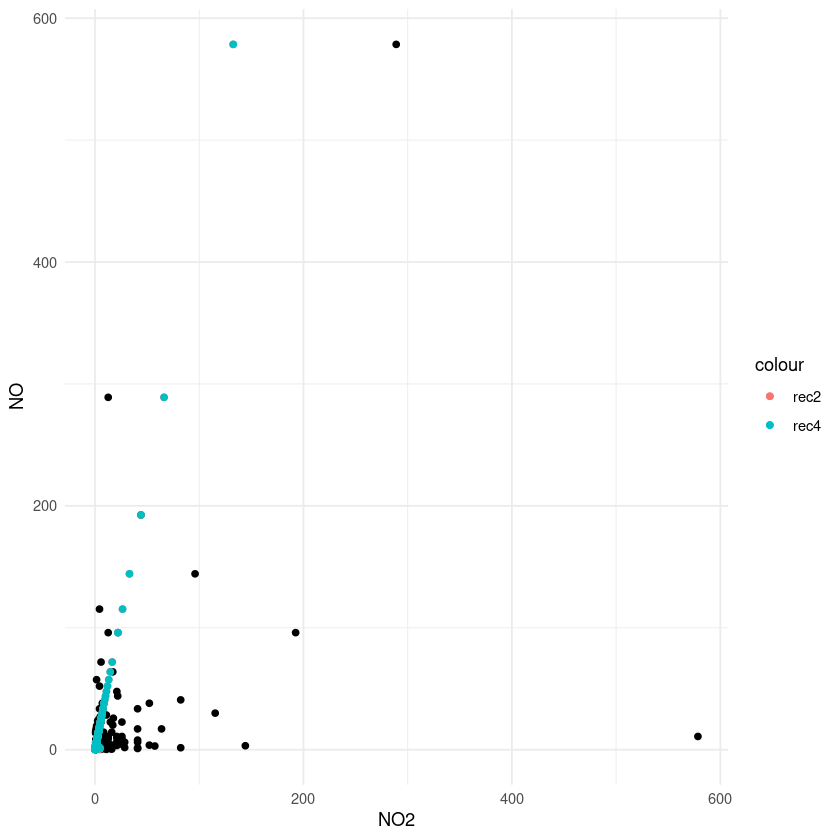

In [26]:
ggplot(summer_trafo, aes(x = NO2, y = NO)) +
geom_point() + 
geom_point(aes(x = NO2, y = NO, color = "rec2"), rec2) + 
geom_point(aes(x = NO2, y = NO, color = "rec4"), rec4) + 
theme_minimal()

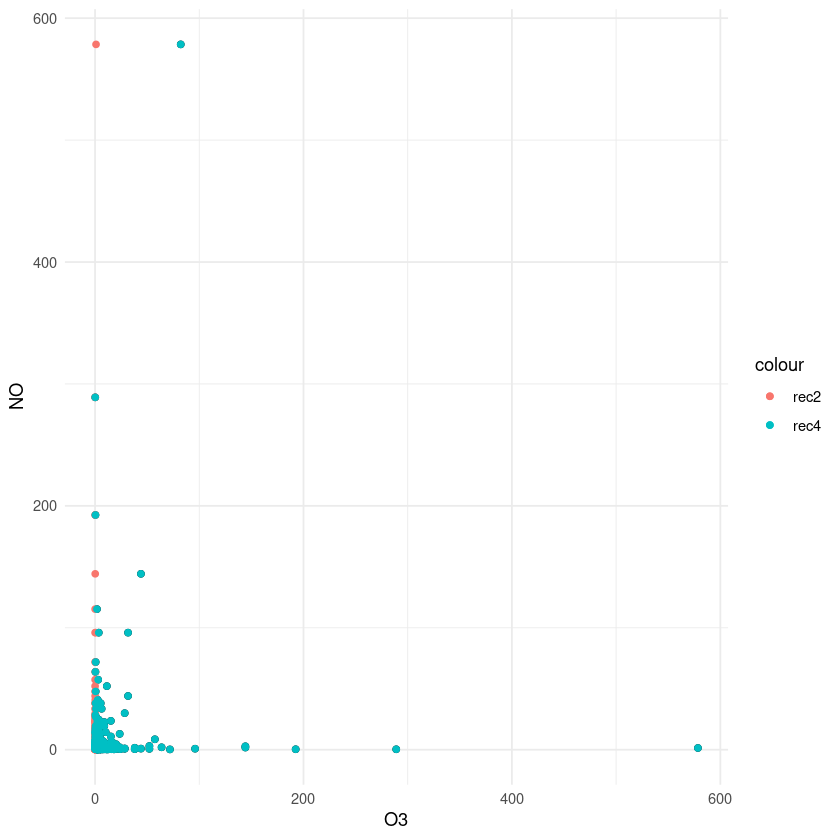

In [27]:
ggplot(summer_trafo, aes(x = O3, y = NO)) +
geom_point() + 
geom_point(aes(x = O3, y = NO, color = "rec2"), rec2) + 
geom_point(aes(x = O3, y = NO, color = "rec4"), rec4) + 

theme_minimal()

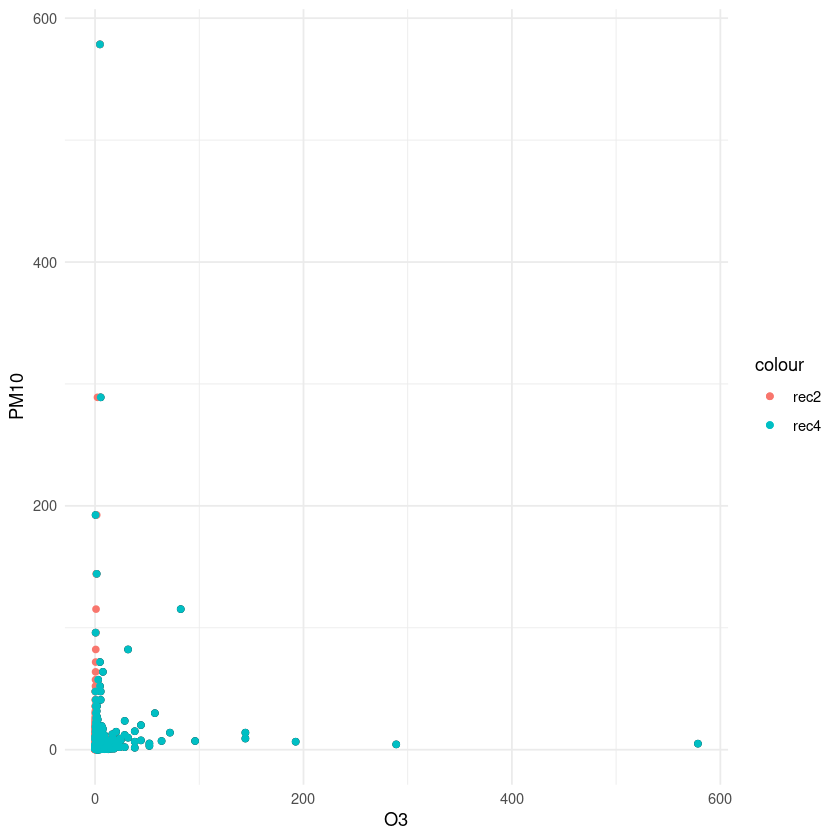

In [28]:
ggplot(summer_trafo, aes(x = O3, y = PM10)) +
geom_point() + 
geom_point(aes(x = O3, y = PM10, color = "rec2"), rec2) + 
geom_point(aes(x = O3, y = PM10, color = "rec4"), rec4) + 
theme_minimal()

# Doing the same for the winter data, there is supposed to be more dependence

As indicated by other papers. 

In [29]:
winter <- winter %>% as_tibble()
head(winter)

O3,NO2,NO,SO2,PM10
<int>,<int>,<int>,<int>,<int>
27,50,112,13,34
27,51,126,13,29
15,43,90,21,33
9,71,470,44,101
20,51,167,48,30
8,50,211,16,44


# Visibly more dependence than in summer between NO's and PM10

Plots again on the following slides

In [30]:
winter_trafo <- transform_unitfrechet(winter) %>% as_tibble()

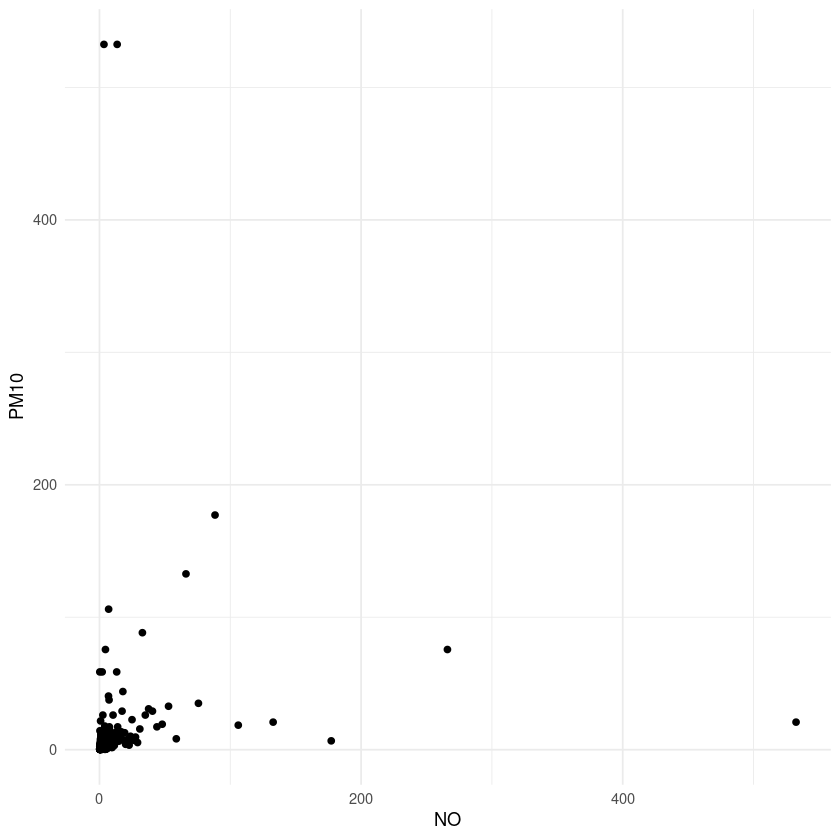

In [31]:
ggplot(winter_trafo, aes(x = NO, y = PM10)) +
geom_point() + 
theme_minimal()

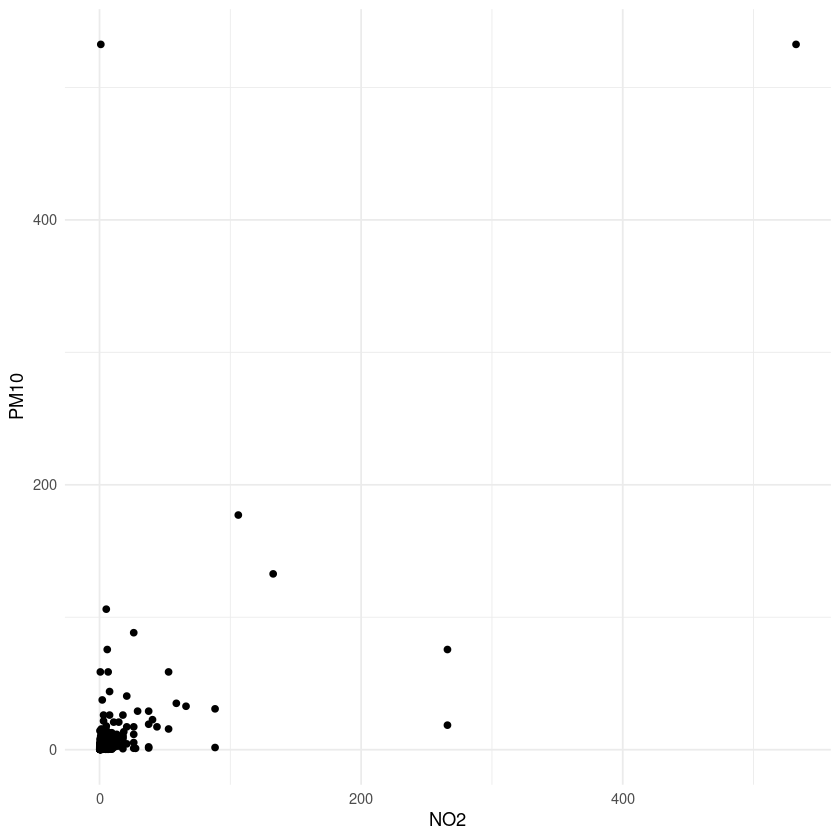

In [32]:
ggplot(winter_trafo, aes(x = NO2, y = PM10)) +
geom_point() + 
theme_minimal()

# Inspect closer by applying max stable PCA for p = 1,...,4 again

In [33]:
maxPCA_w1 <- max_stable_prcomp(winter_trafo, p = 1, n_initial_guesses = 1000)

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.



In [34]:
maxPCA_w2 <- max_stable_prcomp(winter_trafo, p = 2, n_initial_guesses = 1000)

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.



In [35]:
maxPCA_w3 <- max_stable_prcomp(winter_trafo, p = 3, n_initial_guesses = 1000)

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.



In [36]:
maxPCA_w4 <- max_stable_prcomp(winter_trafo, p = 4, n_initial_guesses = 1000)

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.



# Again look at loadings

In [37]:
maxPCA_w1

$p
[1] 1

$d
[1] 5

$decoder_matrix
           [,1]
[1,] 0.02094808
[2,] 4.75213639
[3,] 2.36708996
[4,] 0.09101317
[5,] 2.83497197

$encoder_matrix
             [,1]      [,2]       [,3]        [,4]        [,5]
[1,] 2.980203e-05 0.2104316 0.01331853 0.001405725 0.002711721

$reconstr_matrix
             [,1]        [,2]         [,3]         [,4]         [,5]
[1,] 6.242952e-07 0.004408136 0.0002789976 2.944723e-05 5.680534e-05
[2,] 1.416233e-04 0.999999479 0.0632914754 6.680196e-03 1.288647e-02
[3,] 7.054408e-05 0.498110436 0.0315261608 3.327477e-03 6.418887e-03
[4,] 2.712377e-06 0.019152044 0.0012121618 1.279395e-04 2.468023e-04
[5,] 8.448792e-05 0.596567577 0.0377576618 3.985191e-03 7.687653e-03

$loss_fctn_value
[1] 4.214856

$optim_conv_status
[1] 4

$s
[1] 3

attr(,"class")
[1] "max_stable_prcomp"

In [38]:
maxPCA_w2

$p
[1] 2

$d
[1] 5

$decoder_matrix
             [,1]         [,2]
[1,] 0.8366665462 8.729167e-05
[2,] 0.0002290673 1.187514e+00
[3,] 0.0006420974 5.915110e-01
[4,] 0.0018390646 2.268407e-02
[5,] 0.0012333806 7.084349e-01

$encoder_matrix
             [,1]         [,2]        [,3]        [,4]         [,5]
[1,] 1.1952248886 0.0000428026 0.001365005 0.001069012 1.244595e-06
[2,] 0.0005909984 0.8420948284 0.029252962 0.005627278 1.084639e-02

$reconstr_matrix
             [,1]         [,2]         [,3]         [,4]         [,5]
[1,] 1.0000046795 7.350786e-05 0.0011420543 0.0008944069 1.041311e-06
[2,] 0.0007018190 9.999997e-01 0.0347383118 0.0066824739 1.288025e-02
[3,] 0.0007674507 4.981084e-01 0.0173034496 0.0033285973 6.415762e-03
[4,] 0.0021980957 1.910214e-02 0.0006635763 0.0001276496 2.460404e-04
[5,] 0.0014741672 5.965694e-01 0.0207238194 0.0039865605 7.683964e-03

$loss_fctn_value
[1] 3.229232

$optim_conv_status
[1] 4

$s
[1] 3

attr(,"class")
[1] "max_stable_prcomp"

In [39]:
maxPCA_w3

$p
[1] 3

$d
[1] 5

$decoder_matrix
             [,1]         [,2]       [,3]
[1,] 0.7683244788 0.0006575127 0.00207190
[2,] 0.0098085797 0.4748671605 0.02404418
[3,] 0.0005771496 0.0049392887 1.20823973
[4,] 0.0017558316 0.0049293392 0.10038004
[5,] 0.0009988922 0.7927077973 0.01383520

$encoder_matrix
             [,1]        [,2]        [,3]         [,4]        [,5]
[1,] 1.3015340501 0.001228439 0.002059777 0.0008699175 0.001101391
[2,] 0.0016413671 0.035555340 0.007264506 0.0042808748 1.261498885
[3,] 0.0004504837 0.010346159 0.827650522 0.0009534802 0.005182190

$reconstr_matrix
             [,1]        [,2]        [,3]         [,4]         [,5]
[1,] 1.0000004707 0.000943840 0.001714809 6.683789e-04 0.0008462259
[2,] 0.0127662005 0.016884063 0.019900176 2.032847e-03 0.5990443936
[3,] 0.0007511799 0.012500641 1.000000245 1.152033e-03 0.0062613274
[4,] 0.0022852746 0.001038548 0.083079592 9.571038e-05 0.0062183559
[5,] 0.0013011245 0.028184995 0.011450709 3.393483e-03 1.0000000026



In [40]:
maxPCA_w4

$p
[1] 4

$d
[1] 5

$decoder_matrix
             [,1]         [,2]        [,3]         [,4]
[1,] 0.8080406631 0.0009289204 0.001316851 0.0003810863
[2,] 0.0005706377 0.9260622669 0.010108812 0.0008397223
[3,] 0.0003751823 0.0094156631 1.129957239 0.0010552763
[4,] 0.0004183291 0.0051824332 0.004476185 0.6852928384
[5,] 0.0011904094 0.5524587818 0.044165716 0.0036287937

$encoder_matrix
             [,1]        [,2]         [,3]        [,4]         [,5]
[1,] 1.2375604406 0.001012212 0.0007531024 0.001095063 0.0008059688
[2,] 0.0005252333 1.079841121 0.0070539891 0.001442941 0.0017367752
[3,] 0.0006714102 0.022435299 0.8849892763 0.001917593 0.0040553853
[4,] 0.0009246326 0.007641075 0.0108166497 1.459230207 0.0033267426

$reconstr_matrix
             [,1]        [,2]        [,3]         [,4]         [,5]
[1,] 0.9999991590 0.001003086 0.001165399 0.0008848556 0.0006512556
[2,] 0.0007061987 1.000000116 0.008946190 0.0013362534 0.0016083620
[3,] 0.0007586649 0.025350928 1.000000039 0.00216

In [41]:
error_vals_w <- c(
    maxPCA_w1$loss_fctn_value,
    maxPCA_w2$loss_fctn_value,
    maxPCA_w3$loss_fctn_value,
    maxPCA_w4$loss_fctn_value
)

scree_w_df <- data.frame(p = 1:4, losses = error_vals_w) %>% as_tibble()

# Screeplot looks similar to summer months

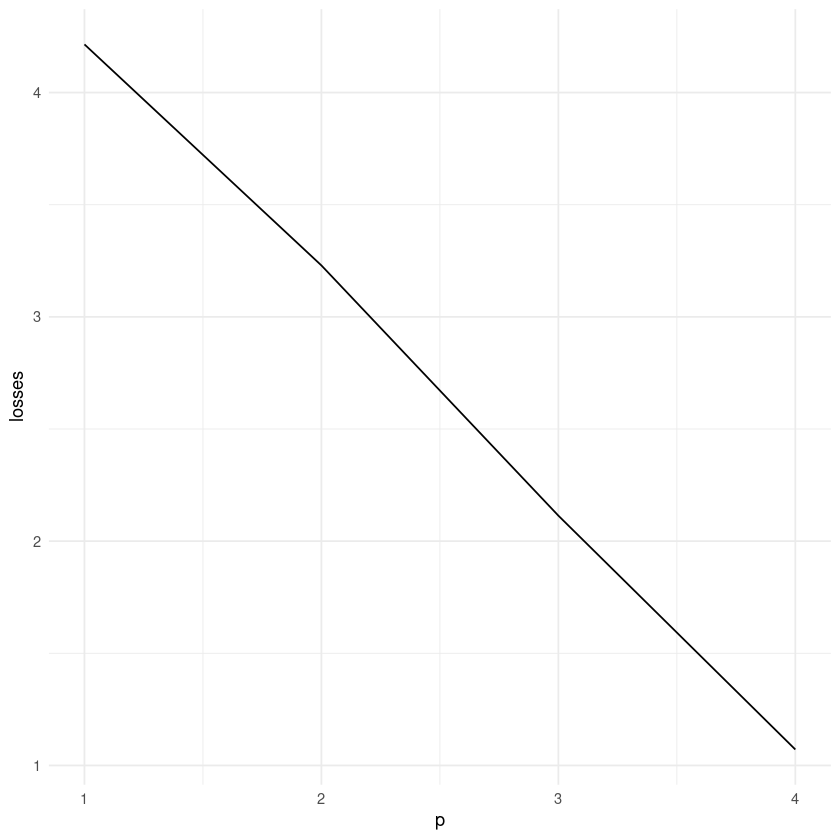

In [42]:
ggplot(scree_w_df, aes(x = p, y = losses)) + 
geom_line() + 
theme_minimal()

In [43]:
enc_w1 <- maxPCA_w1$encoder_matrix
enc_w2 <- maxPCA_w2$encoder_matrix
enc_w3 <- maxPCA_w3$encoder_matrix
enc_w4 <- maxPCA_w4$encoder_matrix

colnames(enc_w1) <- names(summer)
colnames(enc_w2) <- names(summer)
colnames(enc_w3) <- names(summer)
colnames(enc_w4) <- names(summer)

row.names(enc_w1) <- c("PC1")
row.names(enc_w2) <- c("PC1", "PC2")
row.names(enc_w3) <- c("PC1", "PC2", "PC3")
row.names(enc_w4) <- c("PC1", "PC2", "PC3", "PC4")

# Heatmaps for the loadings of the principal components

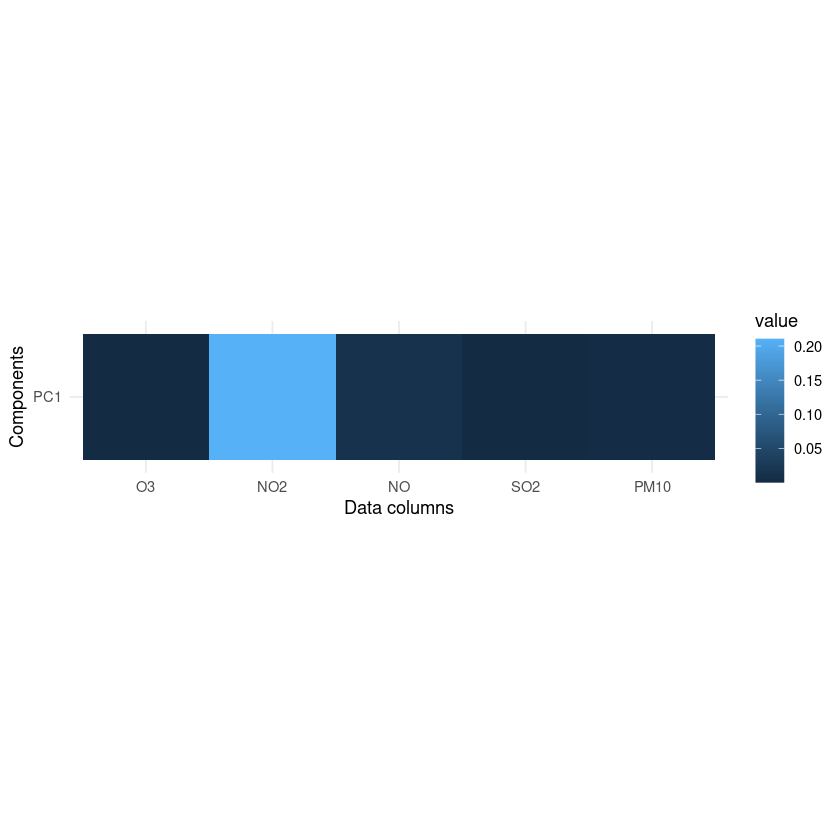

In [44]:
ggplot(melt(t(enc_w1)), aes(Var1,Var2, fill=value)) +
geom_raster() + 
xlab("Data columns") + 
ylab("Components") +
coord_fixed() +
theme_minimal()

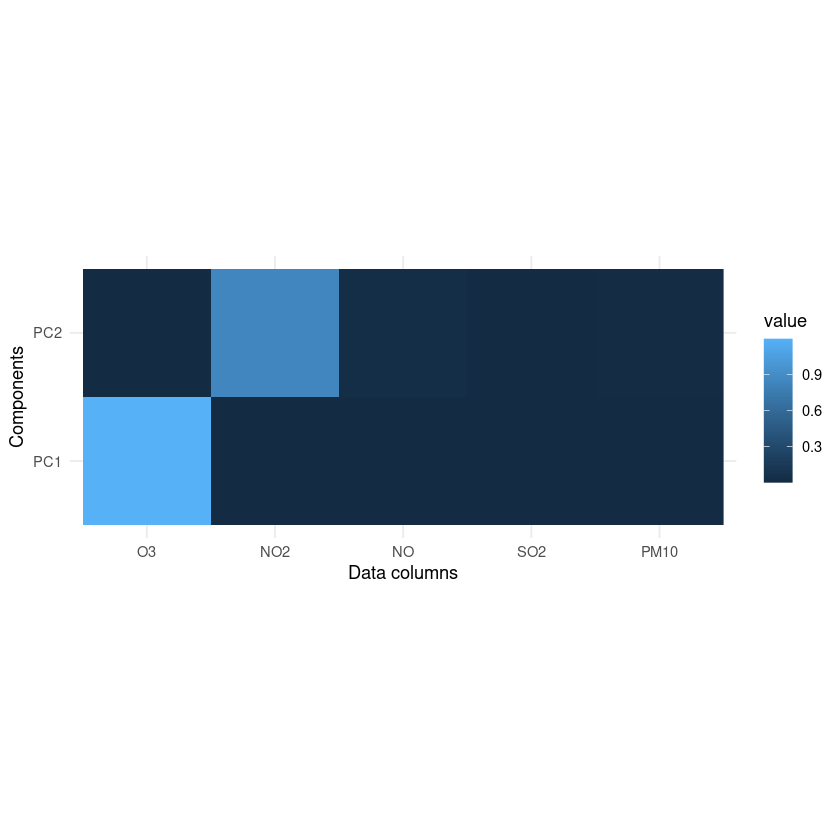

In [45]:
ggplot(melt(t(enc_w2)), aes(Var1,Var2, fill=value)) +
geom_raster() + 
xlab("Data columns") + 
ylab("Components") +
coord_fixed() +
theme_minimal()

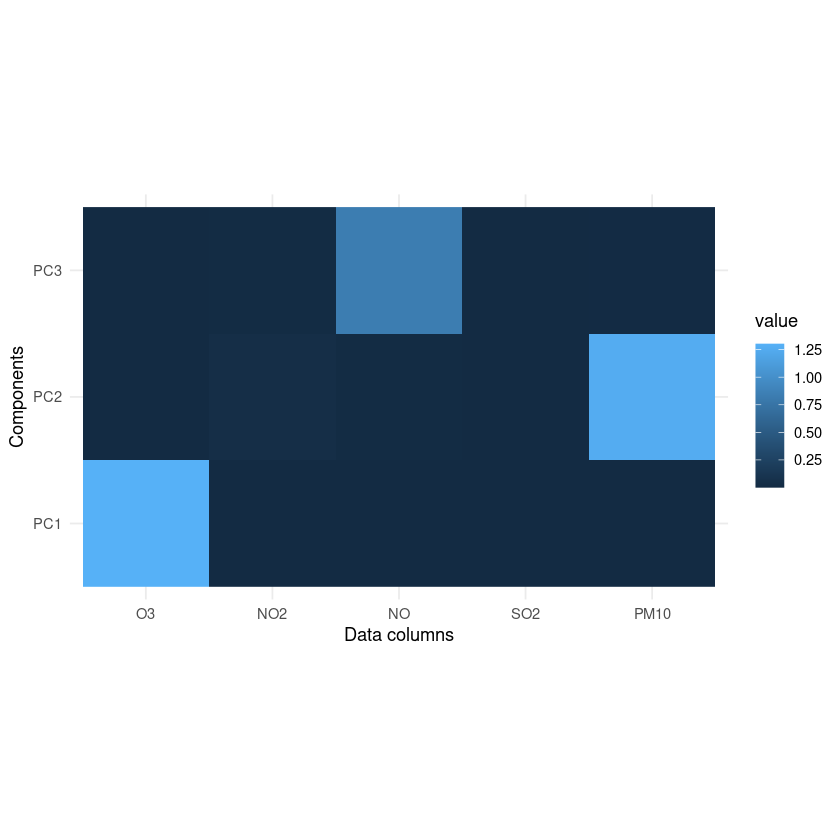

In [46]:
ggplot(melt(t(enc_w3)), aes(Var1,Var2, fill=value)) +
geom_raster() + 
xlab("Data columns") + 
ylab("Components") +
coord_fixed() +
theme_minimal()

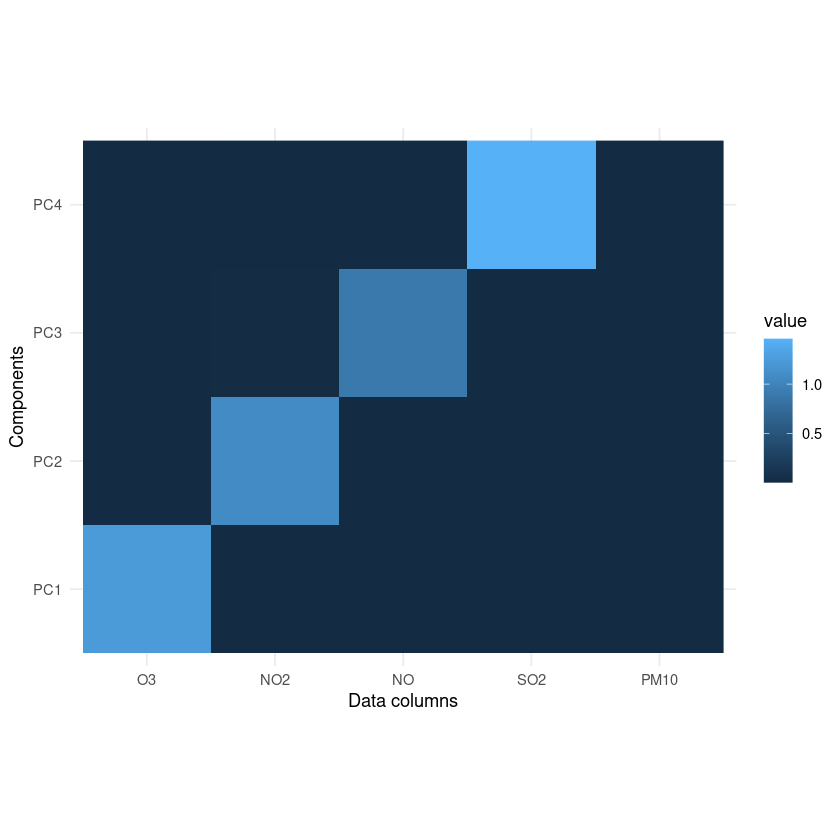

In [47]:
ggplot(melt(t(enc_w4)), aes(Var1,Var2, fill=value)) +
geom_raster() + 
xlab("Data columns") + 
ylab("Components") +
coord_fixed() +
theme_minimal()

# Reconstructions

In [55]:
rec_w2 <- reconstruct(maxPCA_w2, compress(maxPCA_w2, winter_trafo)) %>% as_tibble()
rec_w3 <- reconstruct(maxPCA_w3, compress(maxPCA_w3, winter_trafo)) %>% as_tibble()
rec_w4 <- reconstruct(maxPCA_w4, compress(maxPCA_w4, winter_trafo)) %>% as_tibble()


names(rec_w2) <- names(winter_trafo)
names(rec_w3) <- names(winter_trafo)
names(rec_w4) <- names(winter_trafo)

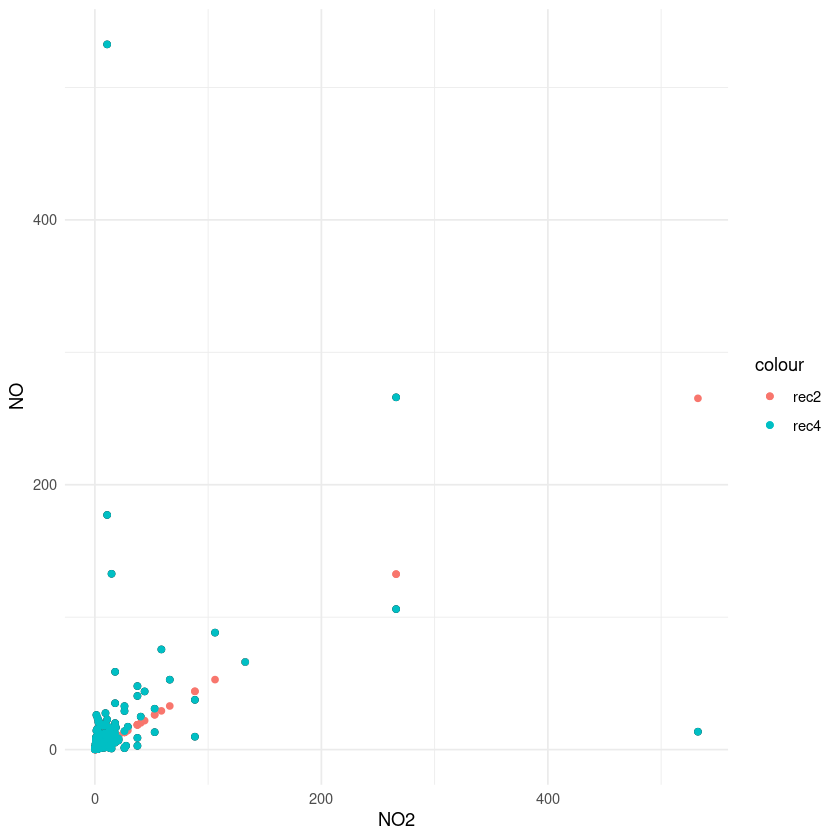

In [56]:
ggplot(winter_trafo, aes(x = NO2, y = NO)) +
geom_point() + 
geom_point(aes(x = NO2, y = NO, color = "rec2"), rec_w2) + 
geom_point(aes(x = NO2, y = NO, color = "rec4"), rec_w4) + 
theme_minimal()

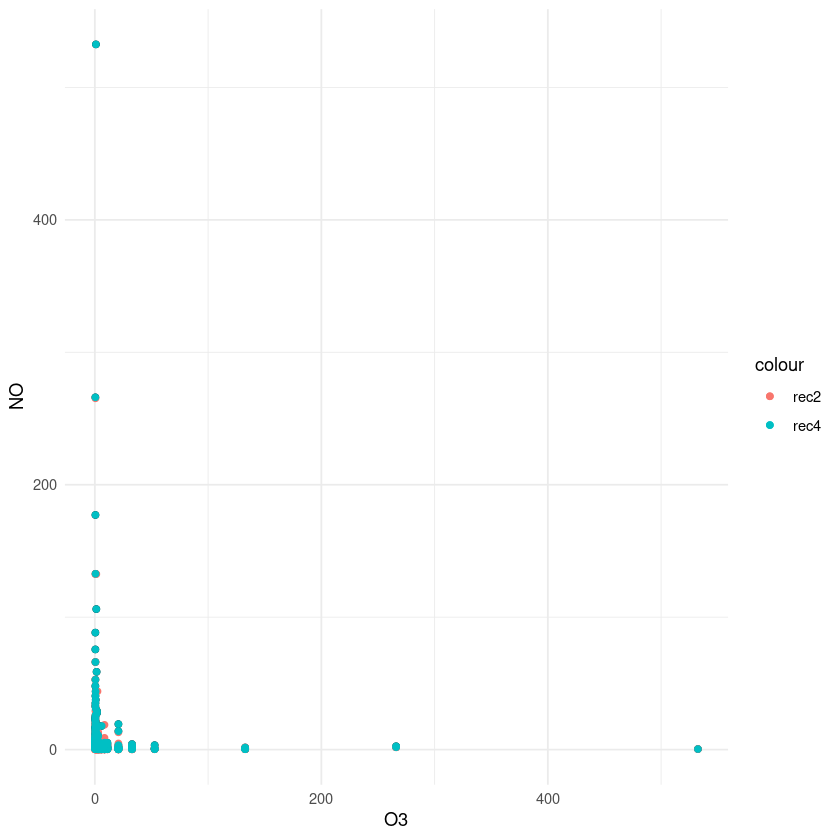

In [57]:
ggplot(winter_trafo, aes(x = O3, y = NO)) +
geom_point() + 
geom_point(aes(x = O3, y = NO, color = "rec2"), rec_w2) + 
geom_point(aes(x = O3, y = NO, color = "rec4"), rec_w4) + 
theme_minimal()

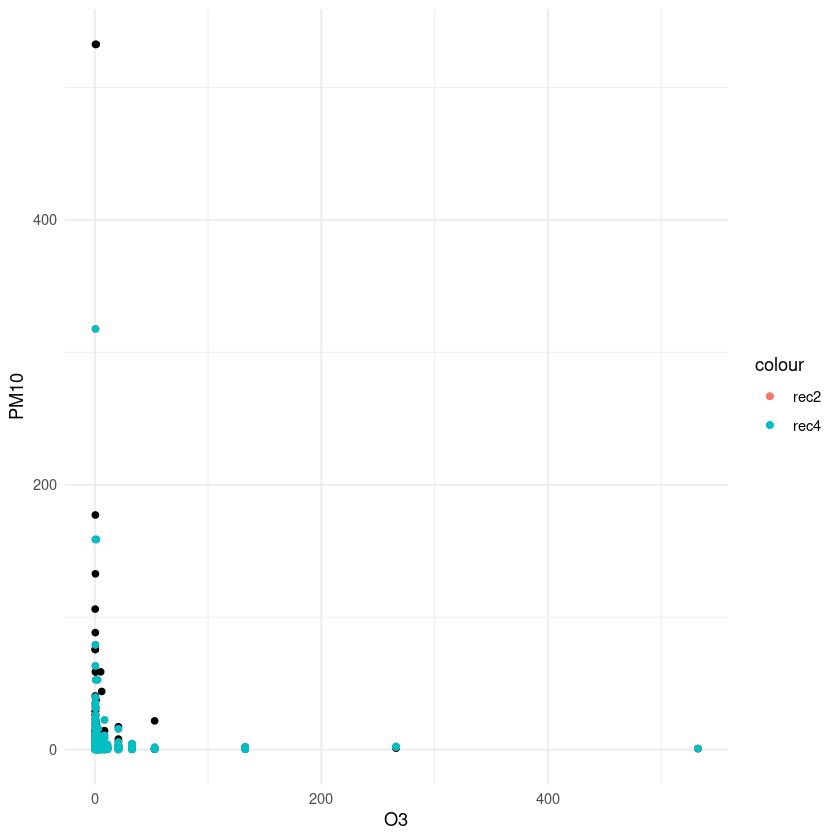

In [58]:
ggplot(winter_trafo, aes(x = O3, y = PM10)) +
geom_point() + 
geom_point(aes(x = O3, y = PM10, color = "rec2"), rec_w2) + 
geom_point(aes(x = O3, y = PM10, color = "rec4"), rec_w4) + 
theme_minimal()